In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 6, 4
from scipy import stats

## Task 1 (5+5+5+5+5=25 pts)

### Consider the dataset HW2_task1.csv, a binary classification problem with two real-valued input attributes.  As you can see from the plot, the dataset is linearly separable. Train a linear SVM (setting C=100000 just to emphasize that no slack variables are allowed) and  answer the following five questions: 

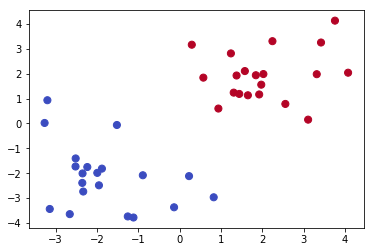

In [4]:
# Data
data1=pd.read_csv('HW2_task1.csv')
X=data1.iloc[:,:2]
Y=data1.iloc[:,2]
plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn import svm
clf = svm.SVC(kernel='linear', C=100000) 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=23)
clf.fit(X, Y)
#correct=1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)
#print("Out of sample, we successfully predict {} percent of the data".format((correct)*100))

SVC(C=100000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### a. Report the separating hyperplane (line).

In [6]:
# your code here
w = clf.coef_[0]
print("The coefficients are " + str(w))

The coefficients are [ 0.66329036  0.56359437]


In [7]:
intercept = clf.intercept_[0]
print("The intercept of the line is " + str(intercept))

The intercept of the line is 0.0431997442494


In [8]:
print("The equation for the separating hyperplane is " + str(w[0]) + "*x1 + " + str(w[1]) +"*x2 +"+ str(intercept) + " =0")

The equation for the separating hyperplane is 0.66329035714*x1 + 0.563594367945*x2 +0.0431997442494 =0


#### b. List the support vectors.

In [9]:
# your code here
print(clf.support_vectors_)

[[ 0.22627536 -2.11810965]
 [-1.5180363  -0.06399383]
 [ 0.93564585  0.5969359 ]]


#### c. Calculate the upper and lower hyperplanes (lines) of the margin.

In [10]:
# your code here
slope = -w[0]/w[1]
support_vector1 = clf.support_vectors_[0]
support_vector2 = clf.support_vectors_[-1]
print("Lower hyperplane is x2_ = " +  str(slope) + "*x1 + " + str(support_vector1[1] - slope * support_vector1[0]))
print("Higher hyperplane is x2_ = " +  str(slope) + "*x1 + " + str(support_vector2[1] - slope * support_vector2[0]))

Lower hyperplane is x2_ = -1.17689316087*x1 + -1.8518077187
Higher hyperplane is x2_ = -1.17689316087*x1 + 1.69809110446


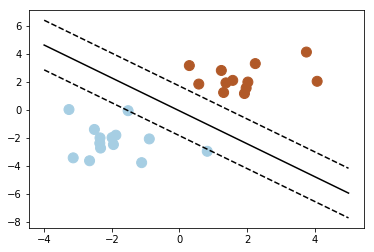

In [11]:
x1 = np.linspace(-4, 5)
x2 = slope * x1 - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane (slope = a) that go through the support vectors.

b = clf.support_vectors_[0]
x2_down = slope * x1 + (b[1] - slope* b[0])

b = clf.support_vectors_[-1]
x2_up = slope * x1 + (b[1] - slope* b[0])

# plot the line, the points, and the nearest vectors to the plane
plt.gca()
plt.plot(x1, x2, 'k-')
plt.plot(x1, x2_down, 'k--')
plt.plot(x1, x2_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none')
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=Y_train, cmap=plt.cm.Paired,s=100)

plt.axis('tight')
plt.show()

#### d. Compute the width of the margin.

In [12]:
# your code here
import math 
print("The width of the margin is " + str(2/(math.sqrt(w[0]**2 + w[1]**2))))

The width of the margin is 2.29779935043


#### e. What would you expect to happen to the margin if the constant C was made very small?

Your answer here.  You can justify your intuitions with code if you'd like, but this is not required.

In [13]:
clf = svm.SVC(kernel='linear', C=0.000001) 
clf.fit(X_train, Y_train)
w = clf.coef_[0]
print("The width of the margin is " + str(2/(math.sqrt(w[0]**2 + w[1]**2))))

The width of the margin is 29787.5708917


As can be seen the margin increases when the value of C is made very small.

## Task 2 (4+8+8=20 pts)

### Given the dataset provided below, answer the following two questions:

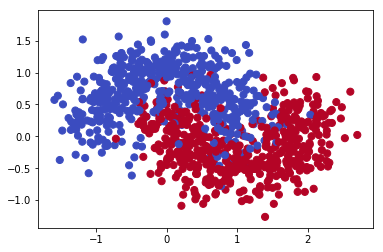

In [26]:
# Data 
data2=pd.read_csv('HW2_task2.csv')
X=data2.iloc[:,:2]
Y=data2.iloc[:,2]

plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));
plt.show()

# Generate training (X_train, Y_train) and testing (X_test, Y_test) datasets for out of sample test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

### a. Train a polynomial SVM using the training set. Use the default arguments, and report both in-sample (training set) and out-of-sample (test set) classification accuracy.

In [27]:
# your code here
clf = svm.SVC(kernel="poly") 
clf.fit(X_train, Y_train)
correctIn=1.0*(clf.predict(X_train)==np.asarray(Y_train)).sum()/len(Y_train)
correctOut=1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)
print("In sample, we successfully predict {} percent of the data".format((correctIn)*100))
print("Out of sample, we successfully predict {} percent of the data".format((correctOut)*100))

In sample, we successfully predict 81.3432835821 percent of the data
Out of sample, we successfully predict 82.7272727273 percent of the data


### Next we will use the validation subset in order to pick the optimal parameters for the polynomial model.

### b. Try polynomials of degree 1,2,3,4. For each degree, consider a variety of regularization constants from the range C=[math.exp(i) for i in np.linspace(-10,2*degree,200)] in order to evaluate the classifier performance over the validation set defined below.  Plot the graph of "Accuracy vs log(C)" for each degree.


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


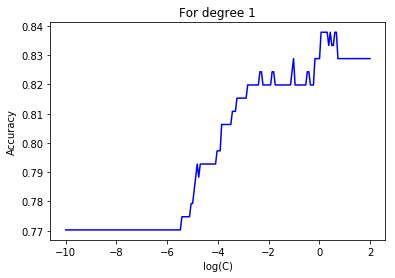

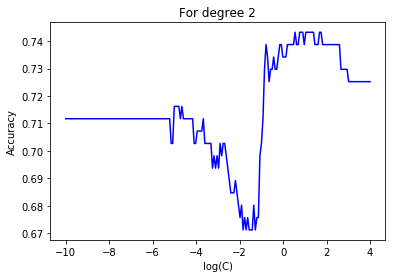

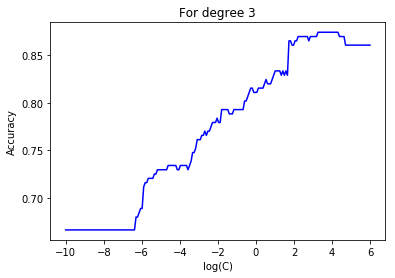

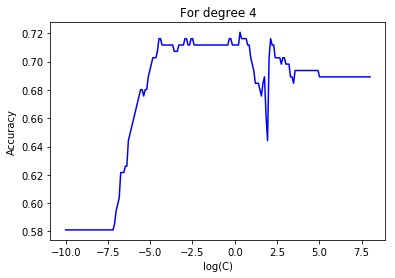

In [28]:
# Next we generate validation data (X_vali, Y_vali) from the training dataset. 
# Denote the remaining training data by (X_train_1, Y_train_1).
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(X_train, Y_train, test_size=0.33, random_state=99) 
# your code here
for degree in range(1,5):
    OS_validation=[]
    C = []
    for i in np.linspace(-10,2*degree,200):
        C.append(math.exp(i))
        clf = svm.SVC(kernel='poly',degree=degree, C=math.exp(i)) 
        clf.fit(X_train_1, Y_train_1)
        correct=1.0*(clf.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali) # OS score for validation set
        OS_validation.append(correct)
    plt.gca()
    plt.plot([np.log(y) for y in C],OS_validation,'b',)
    plt.legend(loc='upper right')
    plt.ylabel('Accuracy')
    plt.xlabel('log(C)')
    plt.title("For degree " + str(degree))
    plt.show()

### c. Choose the optimal degree and the optimal regularization constant C based on these graphs.  Use the optimal degree and C to compute and report the final out-of-sample accuracy of the best classification model selected. 

In [29]:
# your code here
clf = svm.SVC(kernel="poly", degree =3 , C= math.exp(4)) 
clf.fit(X_train, Y_train)
correctOut=1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)
print("Out of sample, we successfully predict {} percent of the data".format((correctOut)*100))

Out of sample, we successfully predict 87.5757575758 percent of the data


## Task 3 (5+5=10pts).

### This task is to be done by hand rather than using Python.

Assume you have a data set as below. It contains records of cars with three features: the type of the car (sports or SUV), the color of the car (red or yellow), and the origin of the car (domestic or imported). And the labels for the data are yes (car was stolen) and no (car was not stolen).

CarType,Color,Origin,Stolen?

sports,red,domestic,yes

sports,red,domestic,yes

sports,red,domestic,yes

sports,red,domestic,no

SUV,red,domestic,no

SUV,red,imported,yes

SUV,yellow,imported,no

SUV,yellow,imported,yes

SUV,yellow,domestic,no

sports,yellow,imported,no

sports,red,imported,yes


### a) Calculate the following sample probabilities:

P(Yes) - 6/11

P(No)  - 5/11

P(Red|Yes) - 5/6

P(SUV|Yes) -2 /6 = 1/3

P(Domestic|Yes) - 3/6 = 1/2

P(Red|No) - 2/5

P(SUV|No)  3/5

P(Domestic|No) 3/5

### b) Using naive Bayes classification, what is the probability that a red, domestic SUV will be stolen? Show your work.

             Class       Color = Red     Origin = domestic      Type = SUV         Total Liklihood
        Stolen = yes       5/6              1/2                   1/3                 0.138
        Stolen = no        2/5              3/5                   3/5                 0.144
        
        
            Class       Total Likelihood     Prior       Unnormalized posterior    Posterior
        Stolen =yes         0.138             6/11         0.0752727               0.5383
        Stolen = no         0.144             5/11         0.0654545               0.4681
                                                          ------------
                                                          0.1398177
              

## Task 4 (4+2+2+2=10pts)

Consider the following problem involving Gaussian Naive Bayes classification.  We use eight factors to predict if people have diabetes or not. The variables are:

y: The label (0 - no diabetes, 1 - diabetes)

t_pre: Number of times pregnant

glu: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

blood_p: Diastolic blood pressure (mm Hg)

triceps: Triceps skin fold thickness (mm)

serum: 2-Hour serum insulin (mu U/ml)

b_m: Body mass index (weight in kg/(height in m)^2)

pedigree_f: Diabetes pedigree function

age: Age (years)

### Using the data provided below, learn a Naive Bayes classifier from the training data and answer the following questions: 

In [4]:
# Training data
data_train=pd.read_csv("HW2_task4_train.csv") 
y_train=data_train.iloc[:,1] 
X_train=data_train.iloc[:,2:] 

# Testing data
data_test=pd.read_csv("HW2_task4_test.csv")
y_test=data_test.iloc[:,1]
X_test=data_test.iloc[:,2:]

print X_train.head()

   t_pre    glu  blood_p  triceps  serum   b_m  pedigree_f   age
0    3.0  158.0     64.0     13.0  387.0  31.2       0.295  24.0
1    0.0   84.0     64.0     22.0   66.0  35.8       0.545  21.0
2    9.0  120.0     72.0     22.0   56.0  20.8       0.733  48.0
3    4.0  110.0     76.0     20.0  100.0  28.4       0.118  27.0
4    2.0  100.0     66.0     20.0   90.0  32.9       0.867  28.0


In [9]:
print y_train.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    1.0
Name: y, dtype: float64


### a) What is the prediction accuracy for Naive Bayes, both in sample (on the training data) and out of sample (on the test data)?

In [5]:
# your code here
def trainGaussianNaiveBayes(X,y):
    prior = 1.*y.sum()/y.count()
    nbc = {'prior':prior}
    X_1 = X[y==1]
    X_0 = X[y==0]
    for j in X.columns:
        nbc[j+'_mu1'] = X_1[j].mean()
        nbc[j+'_sigma1'] = X_1[j].std()
        nbc[j+'_mu0'] = X_0[j].mean()
        nbc[j+'_sigma0'] = X_0[j].std()
    return nbc

def testGaussianNaiveBayes(X,nbc):
    y_pred = pd.Series(index=X.index)
    for i in X.index:
        # compute odds of y=1
        y_pred[i] = nbc['prior']/(1-nbc['prior']) # prior odds
        for j in X.columns:
            thevalue = X.loc[i,j]
            pdf1 = stats.norm.pdf(thevalue,loc=nbc[j+'_mu1'],scale=nbc[j+'_sigma1'])
            pdf0 = stats.norm.pdf(thevalue,loc=nbc[j+'_mu0'],scale=nbc[j+'_sigma0'])
            y_pred[i] = y_pred[i]*pdf1/pdf0 if pdf0 > 0 else 1E10
        # convert odds to probability of y=1
        y_pred[i] = y_pred[i]/(1.0+y_pred[i])
    return y_pred

In [10]:
naive_bayes_classifier = trainGaussianNaiveBayes(X_train,y_train)
y_pred_train = testGaussianNaiveBayes(X_train,naive_bayes_classifier)
y_pred_test = testGaussianNaiveBayes(X_test,naive_bayes_classifier)

# measure accuracy for the binary prediction task
print 'In sample prediction accuracy:',1.0*sum((y_pred_train>0.5)==y_train)/len(y_train)
print 'Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_test)/len(y_test)

In sample prediction accuracy: 0.762711864407
Out of sample prediction accuracy: 0.791139240506


### b) What is the prior probability of diabetes, learned from the training data?

In [11]:
# your code here
print("The prior probability learned from training data is " + str(naive_bayes_classifier['prior']))

The prior probability learned from training data is 0.300847457627


### c) What is the mean and variance of each input variable for patients with diabetes?

In [14]:
# your code here
print("With diabetes")
for j in X_train.columns:
    print("Mean " + j + " : " + str( str(naive_bayes_classifier[j + '_mu1'])))
    print("Sigma " + j + " : " + str( str(naive_bayes_classifier[j + '_sigma1'])))

With diabetes
Mean t_pre : 4.07042253521
Sigma t_pre : 3.51861963057
Mean glu : 144.14084507
Sigma glu : 30.626457178
Mean blood_p : 74.5633802817
Sigma blood_p : 13.7993088796
Mean triceps : 33.4788732394
Sigma triceps : 9.76269745354
Mean serum : 209.211267606
Sigma serum : 126.921000794
Mean b_m : 35.223943662
Sigma b_m : 6.25849057084
Mean pedigree_f : 0.639042253521
Sigma pedigree_f : 0.439042023261
Mean age : 35.7887323944
Sigma age : 10.2635492231


### d) What is the mean and variance of each input variable for patients without diabetes?

In [15]:
# your code here
# your code here
print("Without diabetes")
for j in X_train.columns:
    print("Mean " + j + " : " + str( str(naive_bayes_classifier[j + '_mu0'])))
    print("Sigma " + j + " : " + str( str(naive_bayes_classifier[j + '_sigma0'])))

Without diabetes
Mean t_pre : 2.69090909091
Sigma t_pre : 2.6100606988
Mean glu : 111.466666667
Sigma glu : 24.6918899822
Mean blood_p : 69.2060606061
Sigma blood_p : 11.7132908509
Mean triceps : 27.2
Sigma triceps : 10.4369185248
Mean serum : 127.006060606
Sigma serum : 91.4861376258
Mean b_m : 31.7090909091
Sigma b_m : 6.33761340575
Mean pedigree_f : 0.468684848485
Sigma pedigree_f : 0.291750327733
Mean age : 28.3939393939
Sigma age : 8.53736191168


## Task 5 (10+15=25 pts)

We have an artificial data set split, where the training set contains both labeled and unlabeled data. Column 'y' is the label, and columns '0','1','2' are categorical variables.

In [16]:
data_train=pd.read_csv("HW2_task5_train.csv")
y_Labeled_train=data_train.iloc[:,1] 
X_Labeled_train=data_train.iloc[:,2:] 

data_test=pd.read_csv("HW2_task5_test.csv")
y_Labeled_test=data_test.iloc[:,1]
X_Labeled_test=data_test.iloc[:,2:]

data_Unlabeled=pd.read_csv("HW2_task5_unlabeled.csv")
X_Unlabeled_train=data_Unlabeled.iloc[:,1:]

print X_Labeled_train
print y_Labeled_train

   0  1  2
0  4  6  6
1  2  2  2
2  2  6  2
3  6  6  6
4  1  2  2
5  3  4  4
6  6  1  6
7  1  3  1
8  5  1  6
0    0
1    1
2    0
3    0
4    1
5    0
6    0
7    1
8    1
Name: y, dtype: int64


### a) Learn a discrete Naive Bayes classifier from  X_Labeled_train, use it to predict the labels of X_Labeled_test, and report the classification accuracy.

In [19]:
# your code here
def trainNaiveBayesDiscrete(X,y):
    prior = 1.*y.sum()/y.count()
    nbc = {'prior':prior}
    X_1 = X[y==1]
    X_0 = X[y==0]
    for j in X.columns:
        nbc[j+'_1'] = X_1[j].value_counts(normalize=True)
        nbc[j+'_0'] = X_0[j].value_counts(normalize=True)
    return nbc

def testNaiveBayesDiscrete(X,nbc):
    y_pred = pd.Series(index=X.index)
    for i in X.index:
        # compute odds of y=1
        y_pred[i] = nbc['prior']/(1-nbc['prior']) # prior odds
        for j in X.columns:
            thevalue = X.loc[i,j]
            if thevalue not in nbc[j+'_1']:
                y_pred[i] = y_pred[i]*1E-3
            if thevalue not in nbc[j+'_0']:
                y_pred[i] = y_pred[i]*1E3
            if (thevalue in nbc[j+'_1']) & (thevalue in nbc[j+'_0']):
                y_pred[i] = y_pred[i]*(nbc[j+'_1'][thevalue]+1E-3)/(nbc[j+'_0'][thevalue]+1E-3)
        # convert odds to probability of y=1
        y_pred[i] = y_pred[i]/(1.0+y_pred[i])
    return y_pred

In [21]:
naive_bayes_classifier = trainNaiveBayesDiscrete(X_Labeled_train,y_Labeled_train)
for i,j in naive_bayes_classifier.items():
    print i
    print j
    print
y_pred_test = testNaiveBayesDiscrete(X_Labeled_test,naive_bayes_classifier)

# measure accuracy for the binary prediction task
print 'Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_Labeled_test)/len(y_Labeled_test)

 2_0
6    0.6
4    0.2
2    0.2
Name: 2, dtype: float64

2_1
2    0.50
6    0.25
1    0.25
Name: 2, dtype: float64

prior
0.444444444444

1_1
2    0.50
3    0.25
1    0.25
Name: 1, dtype: float64

1_0
6    0.6
4    0.2
1    0.2
Name: 1, dtype: float64

0_0
6    0.4
4    0.2
3    0.2
2    0.2
Name: 0, dtype: float64

0_1
1    0.50
5    0.25
2    0.25
Name: 0, dtype: float64

Out of sample prediction accuracy: 0.694444444444


### b) Improve the classification by using the unlabeled data, data_Unlabeled, and the EM semi-supervised algorithm to predict the labels of X_Labeled_test, and report the new accuracy.

In [72]:
def initializeNaiveBayesRandom(X_Unlabeled):
    nbc = {'prior':0.5}
    for j in X_Unlabeled.columns:
        thevalues = X_Unlabeled[j].unique()
        nbc[j+'_1'] = {}
        nbc[j+'_0'] = {}
        for jj in thevalues:
            nbc[j+'_1'][jj] = np.random.rand()
            nbc[j+'_0'][jj] = np.random.rand()
    return nbc
    
def EM(X_Labeled,y_Labeled,X_Unlabeled,num_iters):

    # initialize
    
    t = 0
    
    if len(y_Labeled) > 0:
        nbc = trainNaiveBayesDiscrete(X_Labeled,y_Labeled)
    else:
        nbc = initializeNaiveBayesRandom(X_Unlabeled)
    while True:
        t = t + 1
        print 'Iteration',t,'of',num_iters
        
        # E step - classify with nbc for unlabeled data only
        y_pred_Unlabeled = testNaiveBayesDiscrete(X_Unlabeled,nbc)
        
        # M step
        X_for_M_step = pd.concat([X_Labeled,X_Unlabeled]) 
        y_for_M_step = pd.concat([y_Labeled,y_pred_Unlabeled])
        X_for_M_step.reset_index(inplace=True, drop=True)
        y_for_M_step.reset_index(inplace=True, drop=True)
        prior = 1.*y_for_M_step.sum()/y_for_M_step.count()
        nbc = {'prior':prior}
        for j in X_for_M_step.columns:
            nbc[j+'_1'] = {}
            nbc[j+'_0'] = {}
            for theindex in X_for_M_step.index:
                current_X = X_for_M_step.loc[theindex,j]
                current_y = y_for_M_step.loc[theindex]
                if current_X in nbc[j+'_1']:
                    nbc[j+'_1'][current_X] += current_y
                else:
                    nbc[j+'_1'][current_X] = current_y
                if current_X in nbc[j+'_0']:
                    nbc[j+'_0'][current_X] += (1.0-current_y)
                else:
                    nbc[j+'_0'][current_X] = 1.0-current_y
            # normalize probabilities
            tempsum = 0.0
            for k in nbc[j+'_1']:
                tempsum += nbc[j+'_1'][k]
            for k in nbc[j+'_1']:
                nbc[j+'_1'][k] /= tempsum
            tempsum = 0.0
            for k in nbc[j+'_0']:
                tempsum += nbc[j+'_0'][k]
            for k in nbc[j+'_0']:
                nbc[j+'_0'][k] /= tempsum            
                       
        if t==num_iters:
            break
            
    return nbc

In [73]:
naive_bayes_classifier=EM(X_Labeled_train,y_Labeled_train,X_Unlabeled_train,num_iters=50)

Iteration 1 of 50
Iteration 2 of 50
Iteration 3 of 50
Iteration 4 of 50
Iteration 5 of 50
Iteration 6 of 50
Iteration 7 of 50
Iteration 8 of 50
Iteration 9 of 50
Iteration 10 of 50
Iteration 11 of 50
Iteration 12 of 50
Iteration 13 of 50
Iteration 14 of 50
Iteration 15 of 50
Iteration 16 of 50
Iteration 17 of 50
Iteration 18 of 50
Iteration 19 of 50
Iteration 20 of 50
Iteration 21 of 50
Iteration 22 of 50
Iteration 23 of 50
Iteration 24 of 50
Iteration 25 of 50
Iteration 26 of 50
Iteration 27 of 50
Iteration 28 of 50
Iteration 29 of 50
Iteration 30 of 50
Iteration 31 of 50
Iteration 32 of 50
Iteration 33 of 50
Iteration 34 of 50
Iteration 35 of 50
Iteration 36 of 50
Iteration 37 of 50
Iteration 38 of 50
Iteration 39 of 50
Iteration 40 of 50
Iteration 41 of 50
Iteration 42 of 50
Iteration 43 of 50
Iteration 44 of 50
Iteration 45 of 50
Iteration 46 of 50
Iteration 47 of 50
Iteration 48 of 50
Iteration 49 of 50
Iteration 50 of 50


In [75]:
for i,j in naive_bayes_classifier.items():
    print i
    print j
    print
y_pred_test = testNaiveBayesDiscrete(X_Labeled_test,naive_bayes_classifier)

# measure accuracy for the binary prediction task
print 'Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_Labeled_test)/len(y_Labeled_test)

 2_0
{1: 0.00025354452050004917, 2: 0.084939080833025996, 3: 0.036358313455009131, 4: 0.19283900666393208, 5: 0.33931687888851053, 6: 0.34629317563902229}

2_1
{1: 0.36586718258698719, 2: 0.31710895160554908, 3: 0.20817470715530623, 4: 0.036216587563218619, 5: 0.031043731015044373, 6: 0.041588840073894552}

prior
0.503145842065

1_1
{1: 0.25799300848729595, 2: 0.41243395492888707, 3: 0.21399585936170989, 4: 0.056379261226710727, 5: 0.058884844944028514, 6: 0.00031307105136778356}

1_0
{1: 0.0388739778201075, 2: 0.059026728962624044, 3: 0.012808508816437686, 4: 0.2253858291000968, 5: 0.24050345602398301, 6: 0.42340149927675091}

0_0
{1: 0.053677696846460732, 2: 0.054308972744212966, 3: 0.041124662528620876, 4: 0.33535932427302961, 5: 0.26837143165740662, 6: 0.24715791195026918}

0_1
{1: 0.40028192967985365, 2: 0.1904485153439564, 3: 0.23833629853694993, 4: 0.087254305713596741, 5: 0.083667857868886364, 6: 1.1092856756719274e-05}

Out of sample prediction accuracy: 0.944444444444
